In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [2]:
noisy_path = '../datasets/SIDD_small/noisy/'
clean_path = '../datasets/SIDD_small/clean/'

noisy_img = cv.imread(os.path.join(noisy_path, '0001_001_S6_00100_00060_3200_L.png'), cv.IMREAD_COLOR_RGB)
clean_img = cv.imread(os.path.join(clean_path, '0001_001_S6_00100_00060_3200_L.png'), cv.IMREAD_COLOR_RGB)

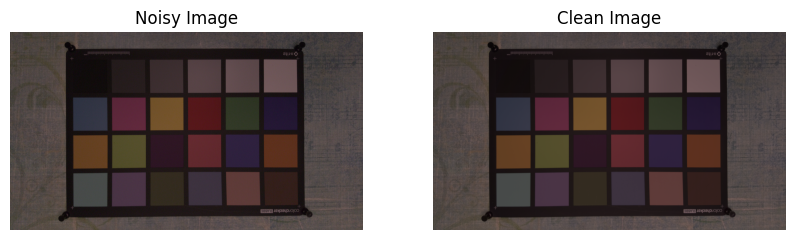

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Noisy Image')
plt.subplot(1,2,2)
plt.imshow(clean_img)
plt.title('Clean Image')
plt.axis('off')
plt.show()

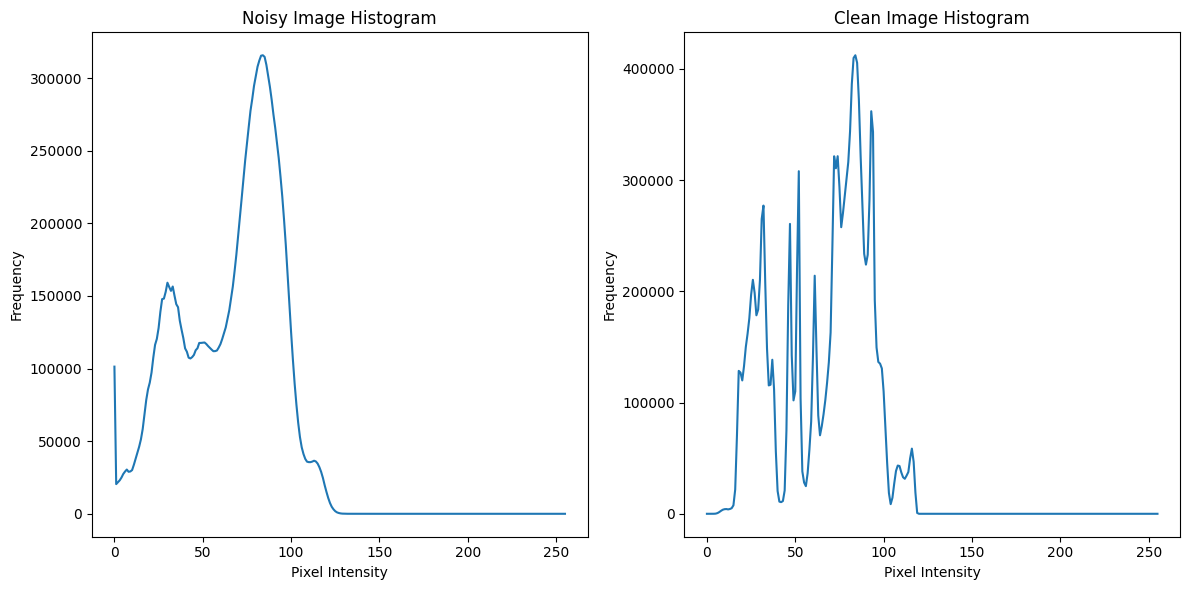

In [4]:
hist_noisy = cv.calcHist([noisy_img], [0], None, [256], [0, 256])
hist_clean = cv.calcHist([clean_img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_noisy)
plt.title('Noisy Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_clean)
plt.title('Clean Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

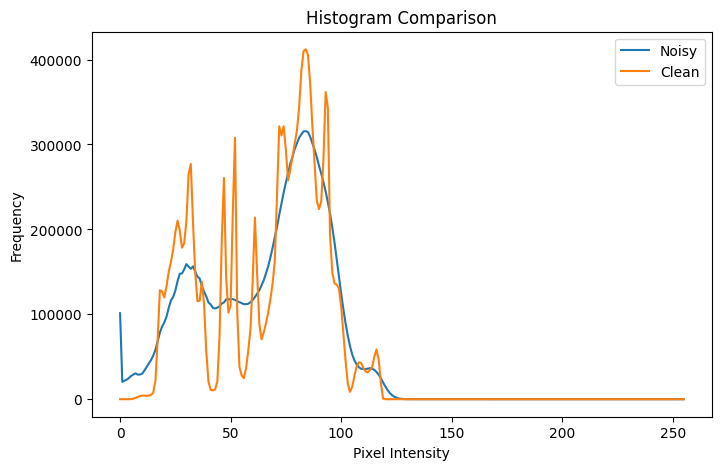

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(hist_noisy, label='Noisy')
plt.plot(hist_clean, label='Clean')
plt.title('Histogram Comparison')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
mse = np.mean((noisy_img.astype("float32") - clean_img.astype("float32")) ** 2)
print(f"MSE: {mse:.2f}")

MSE: 47.45


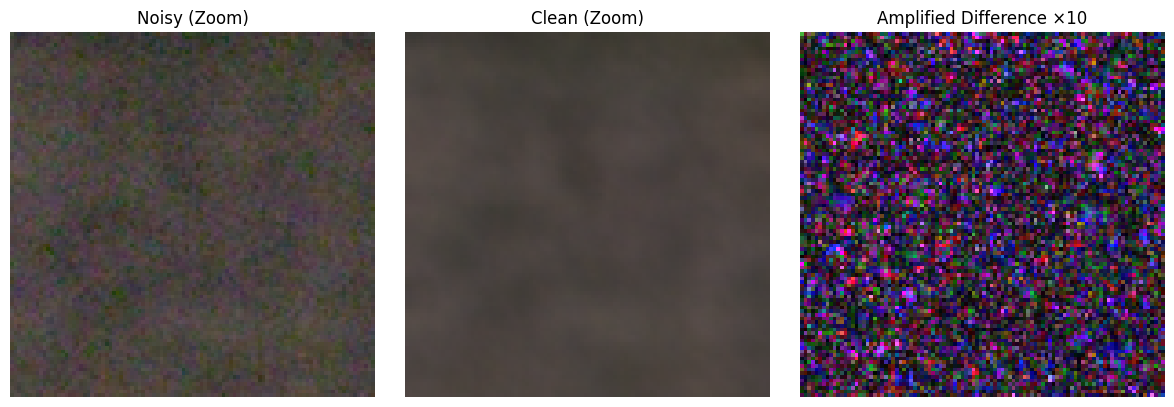

In [7]:
noisy = noisy_img.astype(np.float32)
clean = clean_img.astype(np.float32)

diff = np.abs(noisy - clean)
diff_amplified = np.clip(diff * 10, 0, 255).astype(np.uint8)

y1, y2 = 100, 200
x1, x2 = 200, 300
zoom_noisy = noisy[y1:y2, x1:x2].astype(np.uint8)
zoom_clean = clean[y1:y2, x1:x2].astype(np.uint8)
zoom_diff = diff_amplified[y1:y2, x1:x2]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(zoom_noisy)
plt.title("Noisy (Zoom)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zoom_clean)
plt.title("Clean (Zoom)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zoom_diff)
plt.title("Amplified Difference ×10")
plt.axis("off")

plt.tight_layout()
plt.show()
